In [1]:
import dv_processing as dv
from snn_delays.snn_refactored import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils_refact_minimal import train, get_device, propagate_batch_simple
from snn_delays.utils.test_behavior import tb_save_max_last_refact
from snn_delays.utils.visualization_utils import plot_conv_filters

device = get_device()
dataset = 'davis_loihi'
total_time = 100
batch_size = 64
folder_name = 'FromLoihi_ABCXO_15Hz_64_robust'

# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  sensor_size_to = 64,
                  folder_name = folder_name)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()

Running on: cuda:0
[Downsample(time_factor=1, spatial_factor=1.0, sensor_size=None, target_size=None), ToFrame(sensor_size=(64, 64, 2), time_window=None, event_count=None, n_time_bins=100, n_event_bins=None, overlap=0, include_incomplete=False)]


In [2]:
dataset_dict['time_ms'] = 100
dataset_dict

{'num_input': 8192,
 'num_input_channels': 2,
 'num_training_samples': 7500,
 'num_output': 5,
 'dataset_name': 'davis_loihi',
 'time_ms': 100}

Delta t: 1.0 ms
SNN(
  (layers): ModuleList(
    (0): Conv2DSNNLayer(
      (conv): Conv2d(2, 24, kernel_size=(4, 4), stride=(4, 4), bias=False)
    )
    (1): Conv2DSNNLayer(
      (conv): Conv2d(24, 2, kernel_size=(2, 2), stride=(2, 2), bias=False)
    )
    (2): FlattenSNNLayer()
    (3): FeedforwardSNNLayer(
      (linear): Linear(in_features=128, out_features=96, bias=False)
    )
    (4): FeedforwardSNNLayer(
      (linear): Linear(in_features=96, out_features=96, bias=False)
    )
    (5): FeedforwardSNNLayer(
      (linear): Linear(in_features=96, out_features=5, bias=False)
    )
  )
  (criterion): MSELoss()
)


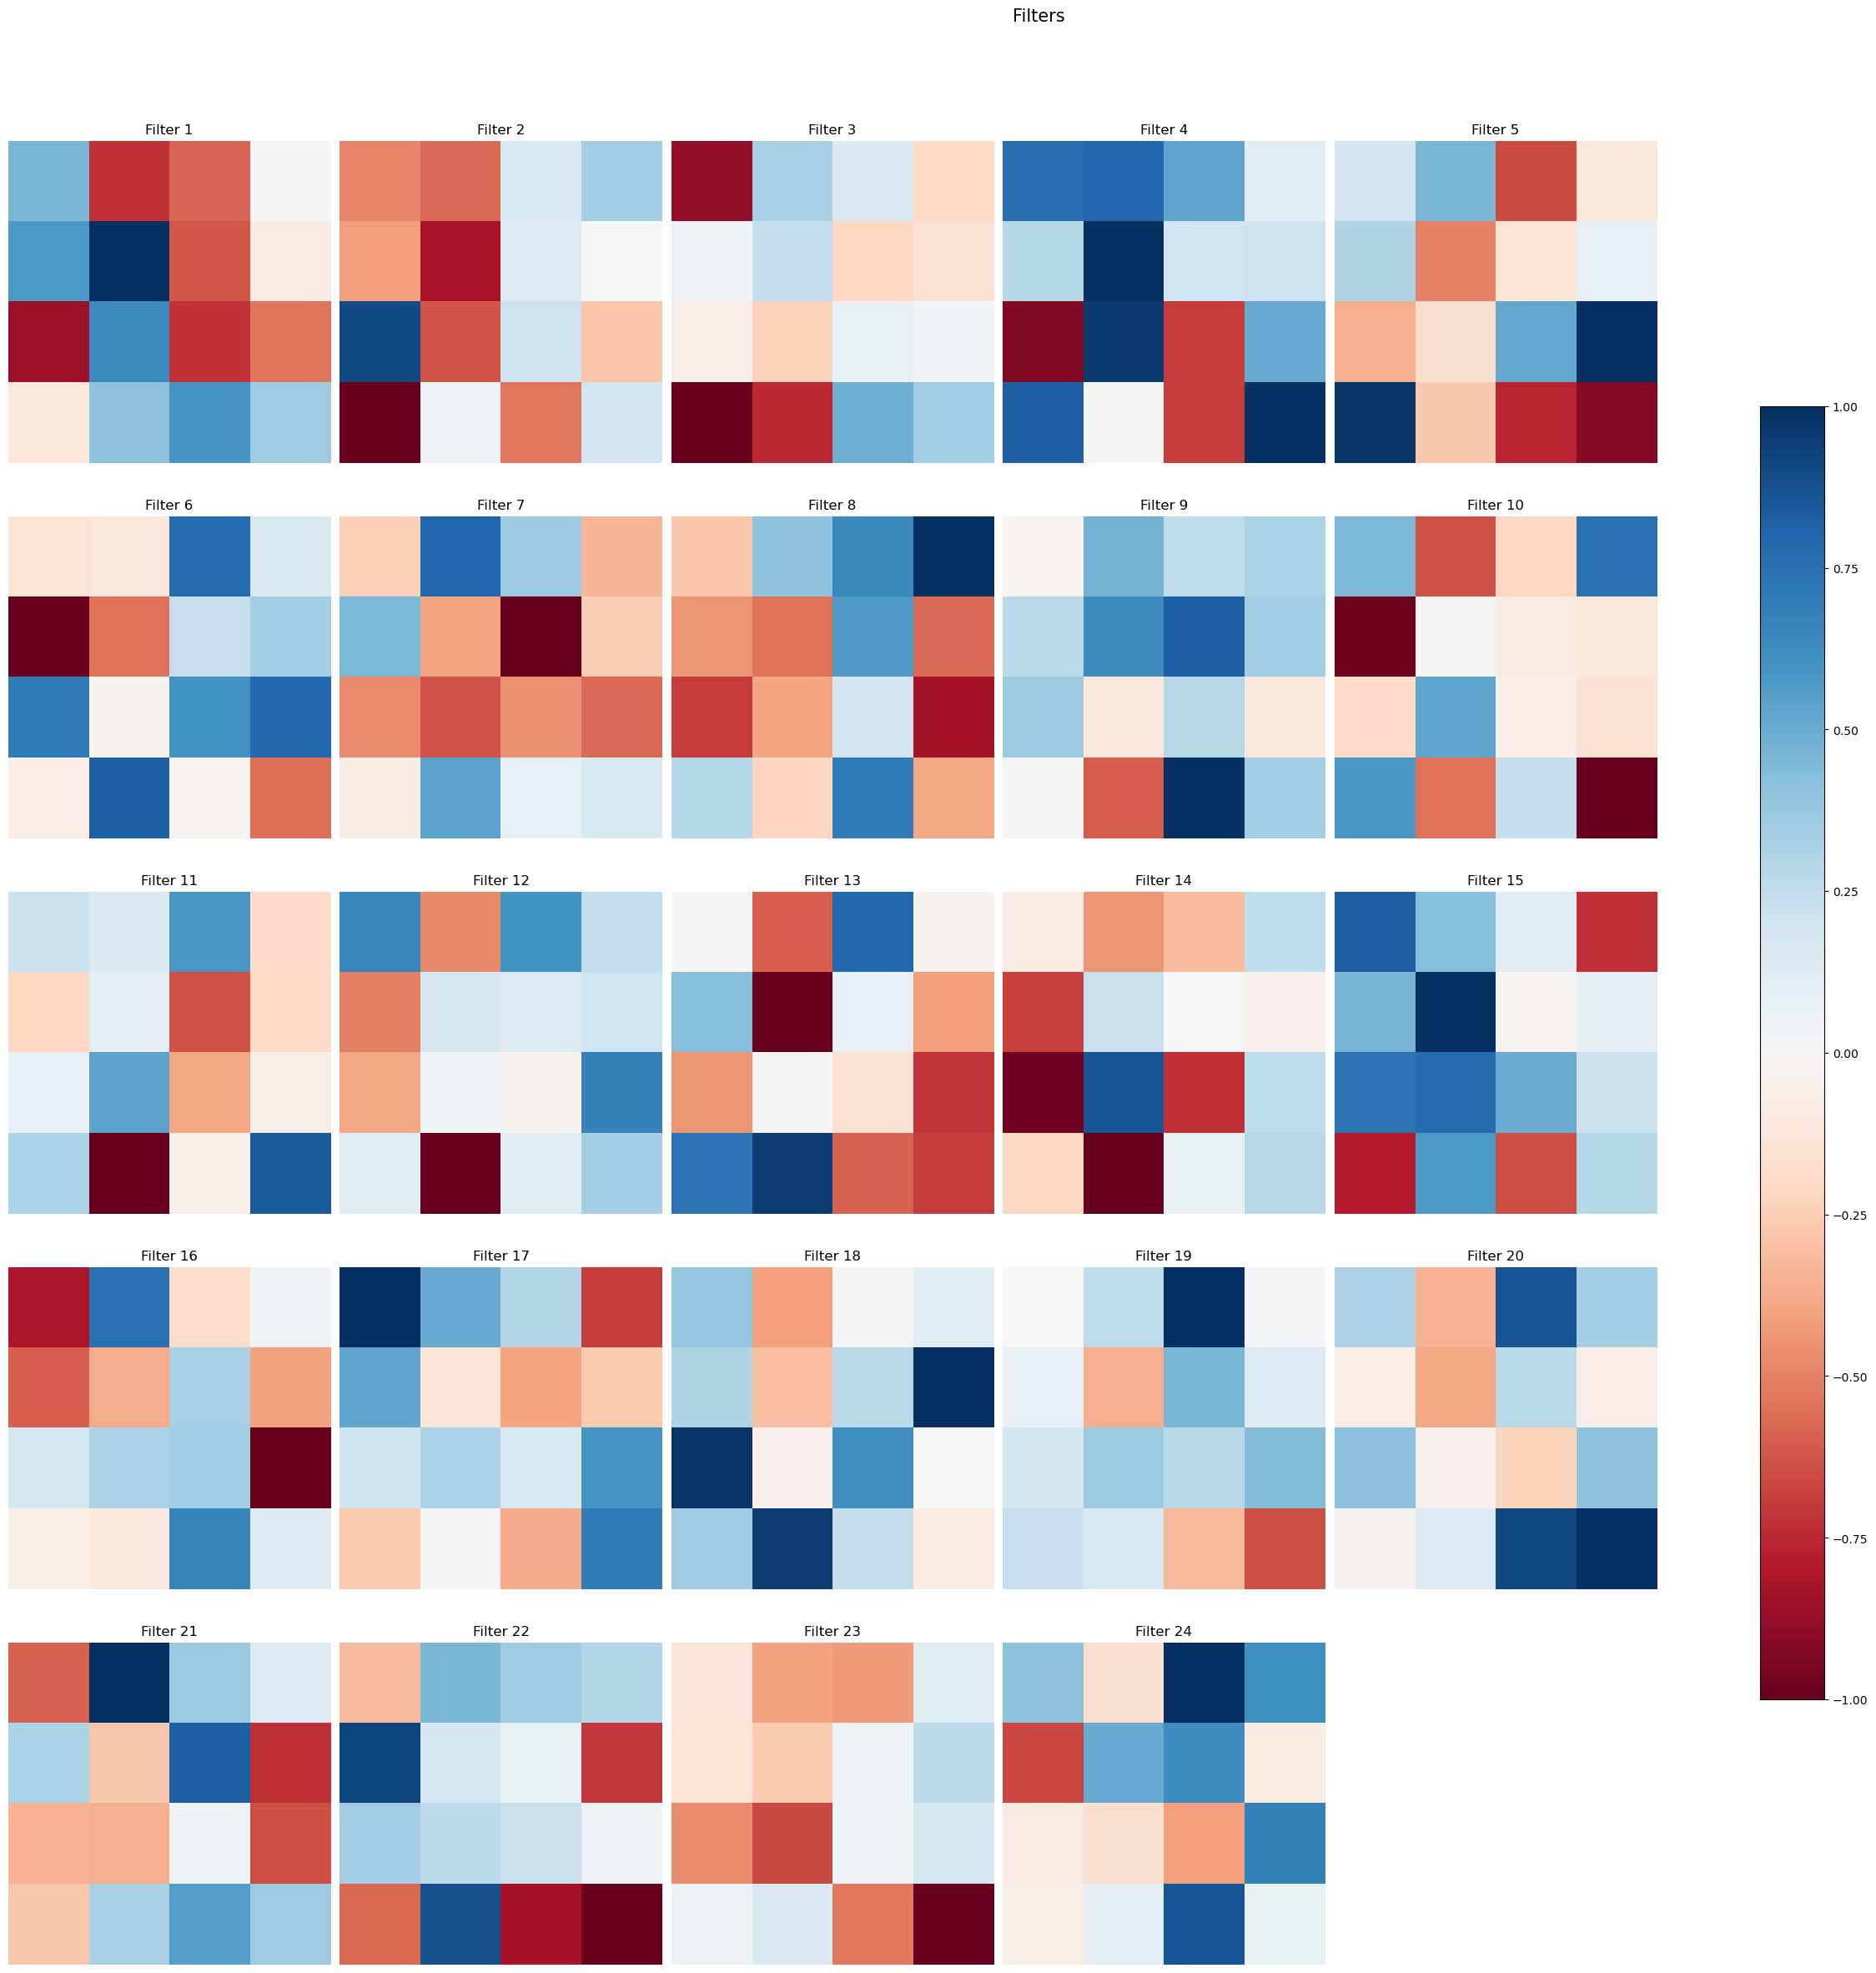

In [4]:
ckpt_dir = 'abcxo_64_Conv_15Hz'

# structure = (96, 2, 'f')

# extra_kwargs = {'conv':[(2, 16, 4), (16, 24, 4)]}

#extra_kwargs = {}

#tau_m = 50 # initial experiments
tau_m = 5.0 

model_config = [
    {
        'type': 'Conv2D', 
        'out_channels': 24, 
        'kernel_size': 4 
    }, 
    {
        'type': 'Conv2D', 
        'out_channels': 2, 
        'kernel_size': 2 
    }, 
    {
        'type': 'Flatten'
    }, 
    {
        'type': 'Feedforward', 
        'num_out': 96 # Number of neurons in this dense layer
    },
    {
        'type': 'Feedforward', 
        'num_out': 96 # Number of neurons in this dense layer
    }
]


snn = SNN(dataset_dict=dataset_dict, model_config=model_config,
           tau_m=tau_m, win=total_time, loss_fn='spk_count', batch_size=batch_size, device=device, 
        )

#snn.input2spike_th = 0.5

snn.model_name = 'abcxo_conv_64_15Hz'
snn.set_layers()
snn.to(device)
print(snn)

plot_conv_filters(snn.layers[0])

Epoch [1/20], learning_rates 0.001000, 0.100000


c:\Users\Alberto\anaconda3\envs\deeplearning\lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Step [39/117], Loss: 0.15349
Step [78/117], Loss: 0.13509
Step [117/117], Loss: 0.11636
Time elasped: 144.12443804740906
1456
Test Loss: 0.11848473646070647
Avg spk_count per neuron for all 100 time-steps 2286.9780219780223
Test Accuracy of the model on the test samples: 69.643

Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_64_Conv_15Hz
saving max acc: 69.64285714285714
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_64_Conv_15Hz
Epoch [2/20], learning_rates 0.001000, 0.100000
Step [39/117], Loss: 0.10914
Step [78/117], Loss: 0.09489
Step [117/117], Loss: 0.09184
Time elasped: 78.98418855667114
1456
Test Loss: 0.08633462339639664
Avg spk_count per neuron for all 100 time-steps 3007.6201923076915
Test Accuracy of the model on the test samples: 84.684

Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_64_Conv_15Hz
saving max acc: 84.6840659340659

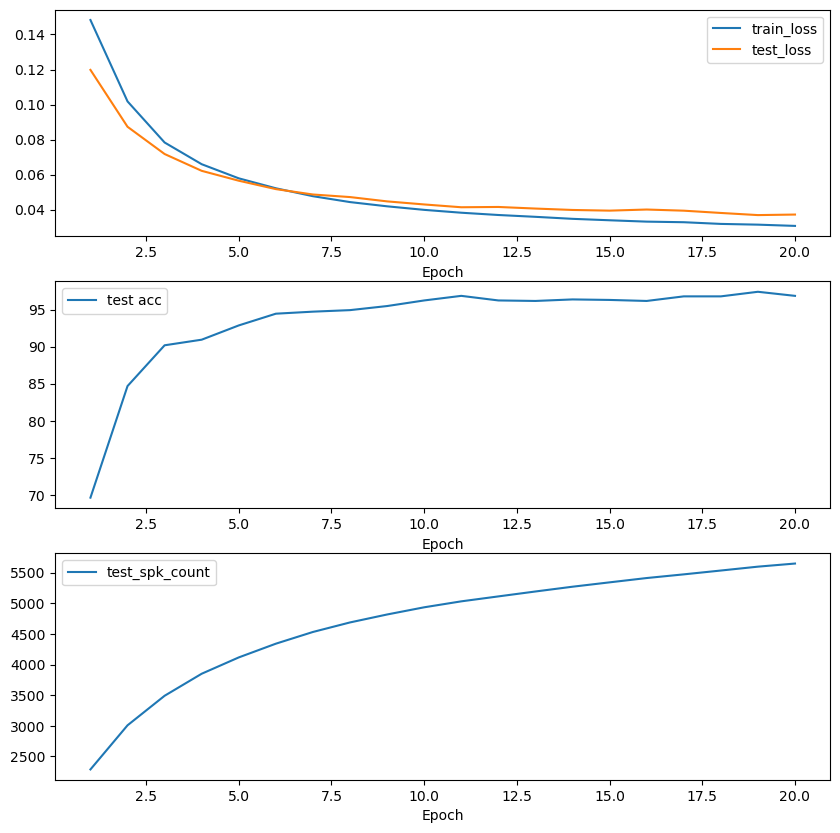

In [5]:
num_epochs = 20
lr = 1e-3
train(snn, train_loader, test_loader, lr, num_epochs, ckpt_dir=ckpt_dir,
       test_behavior=tb_save_max_last_refact, scheduler=(10, 0.95), test_every=1, freeze_taus=True)

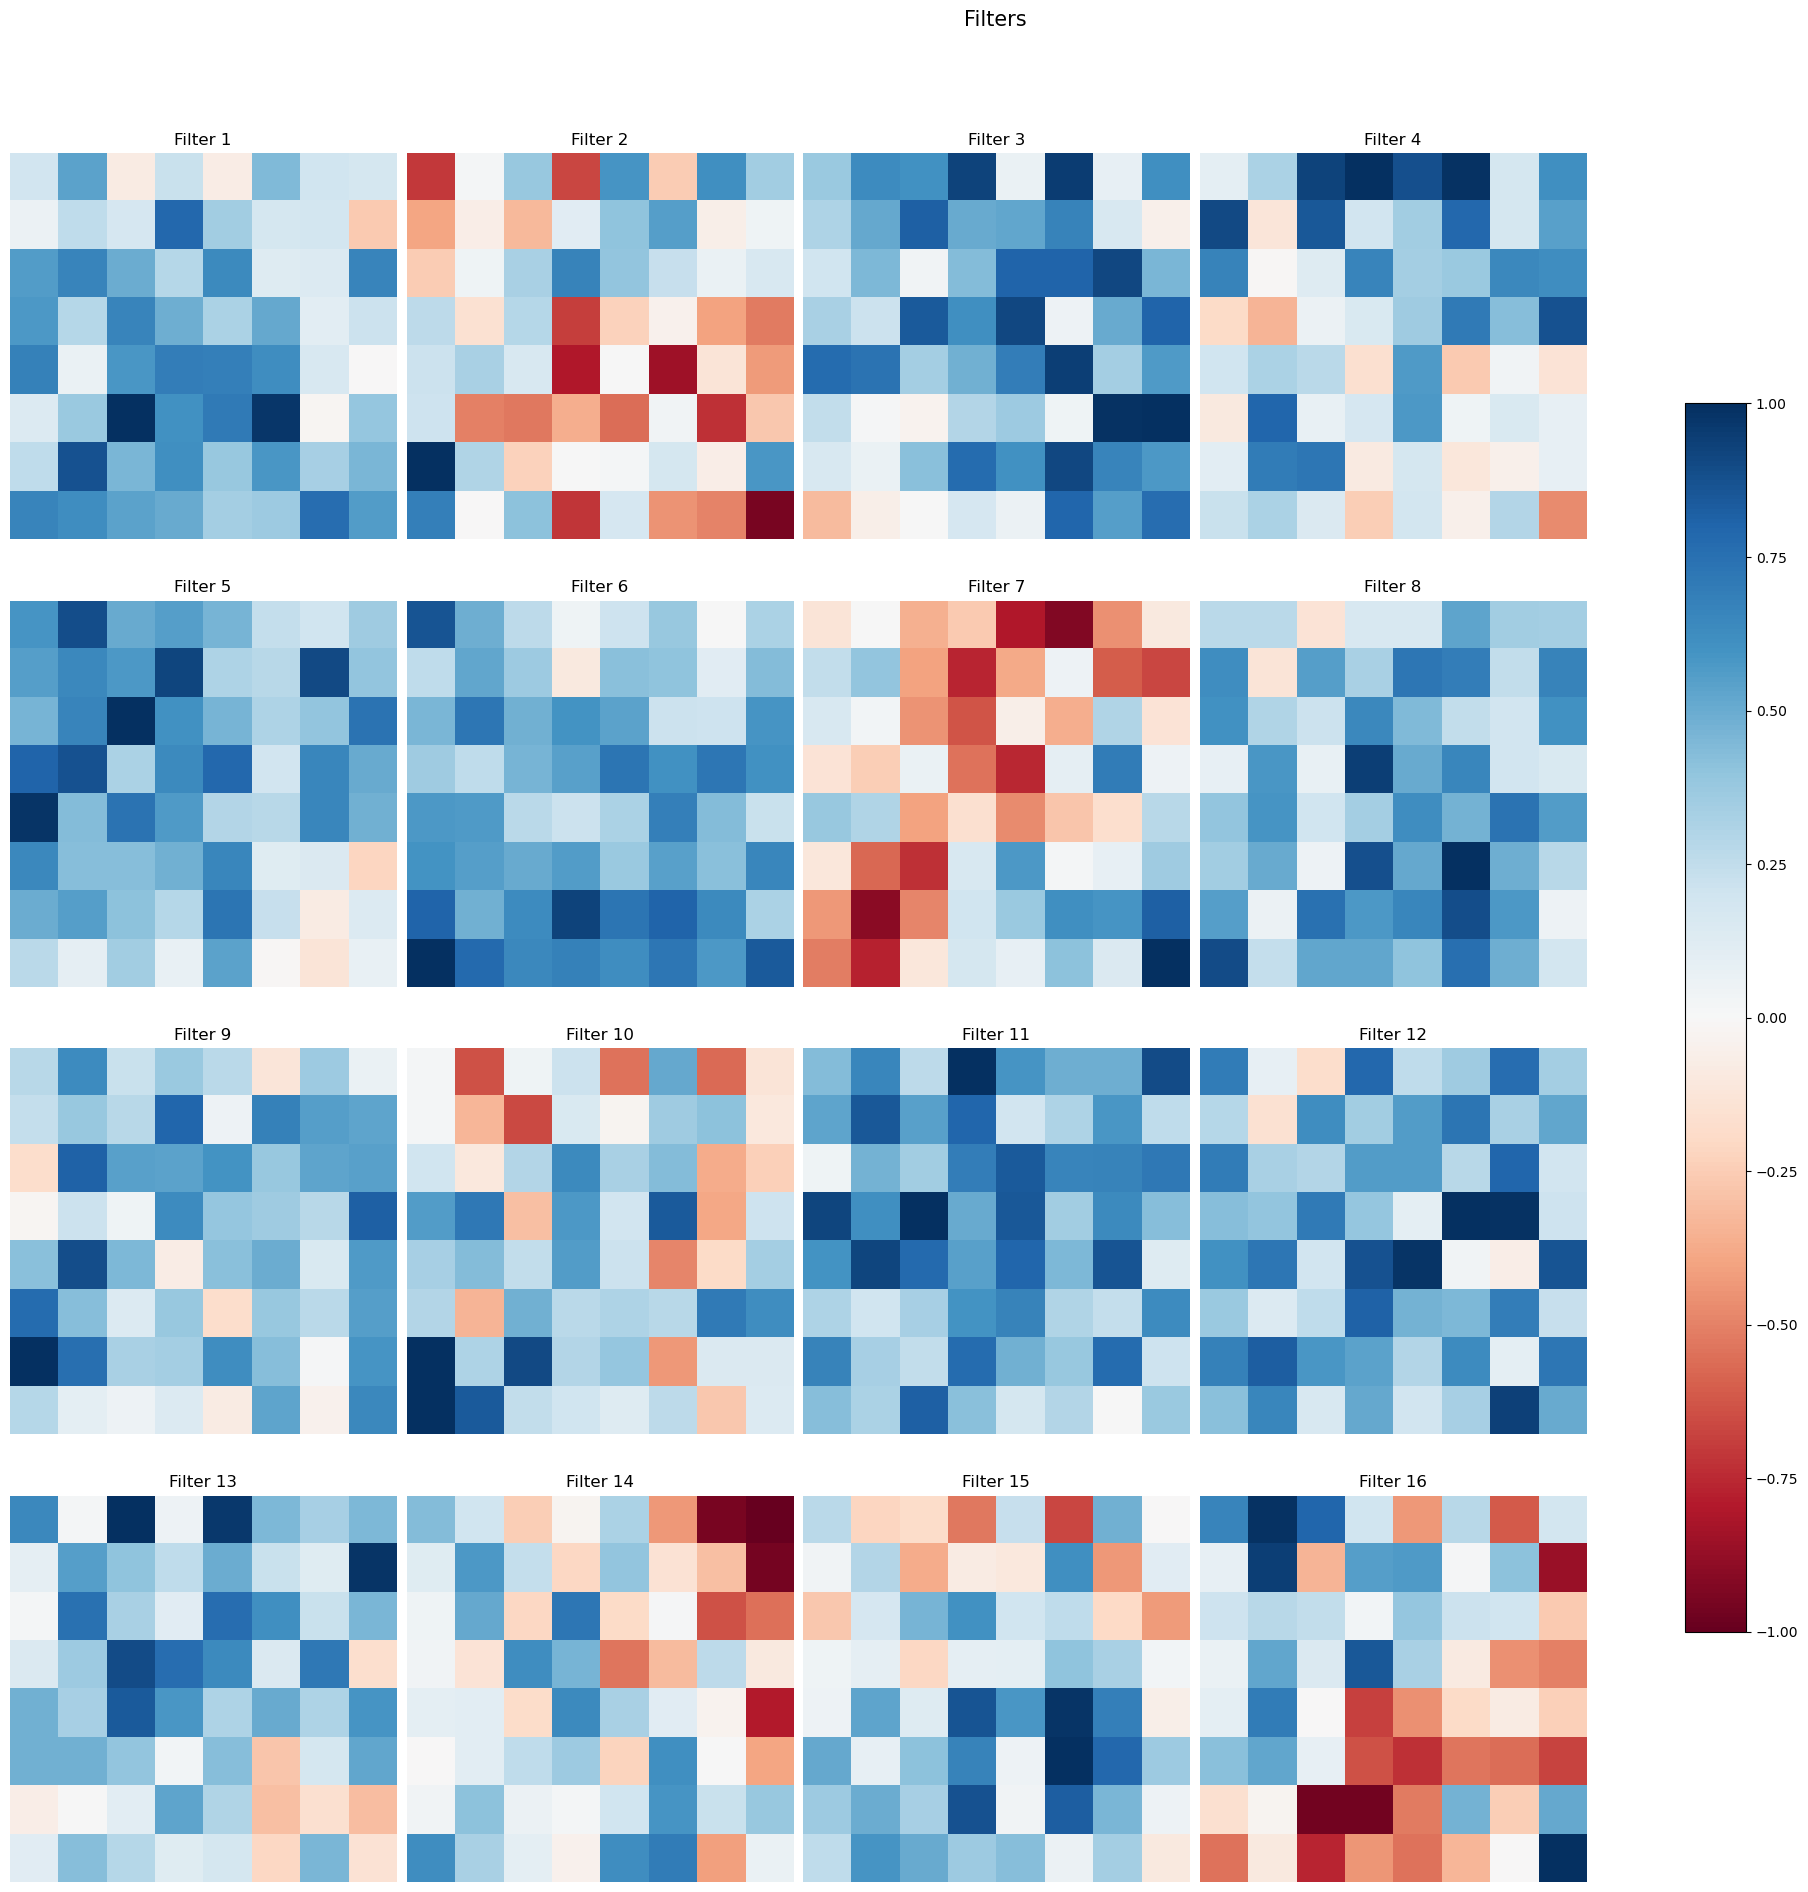

In [5]:
plot_conv_filters(snn.layers[0])

Delta t: 1.0 ms
SNN(
  (layers): ModuleList(
    (0): Conv2DSNNLayer(
      (conv): Conv2d(2, 16, kernel_size=(4, 4), stride=(4, 4), bias=False)
    )
    (1): Conv2DSNNLayer(
      (conv): Conv2d(16, 24, kernel_size=(4, 4), stride=(4, 4), bias=False)
    )
    (2): FlattenSNNLayer()
    (3): FeedforwardSNNLayer(
      (linear): Linear(in_features=384, out_features=96, bias=False)
    )
    (4): FeedforwardSNNLayer(
      (linear): Linear(in_features=96, out_features=96, bias=False)
    )
    (5): FeedforwardSNNLayer(
      (linear): Linear(in_features=96, out_features=5, bias=False)
    )
  )
  (criterion): MSELoss()
)


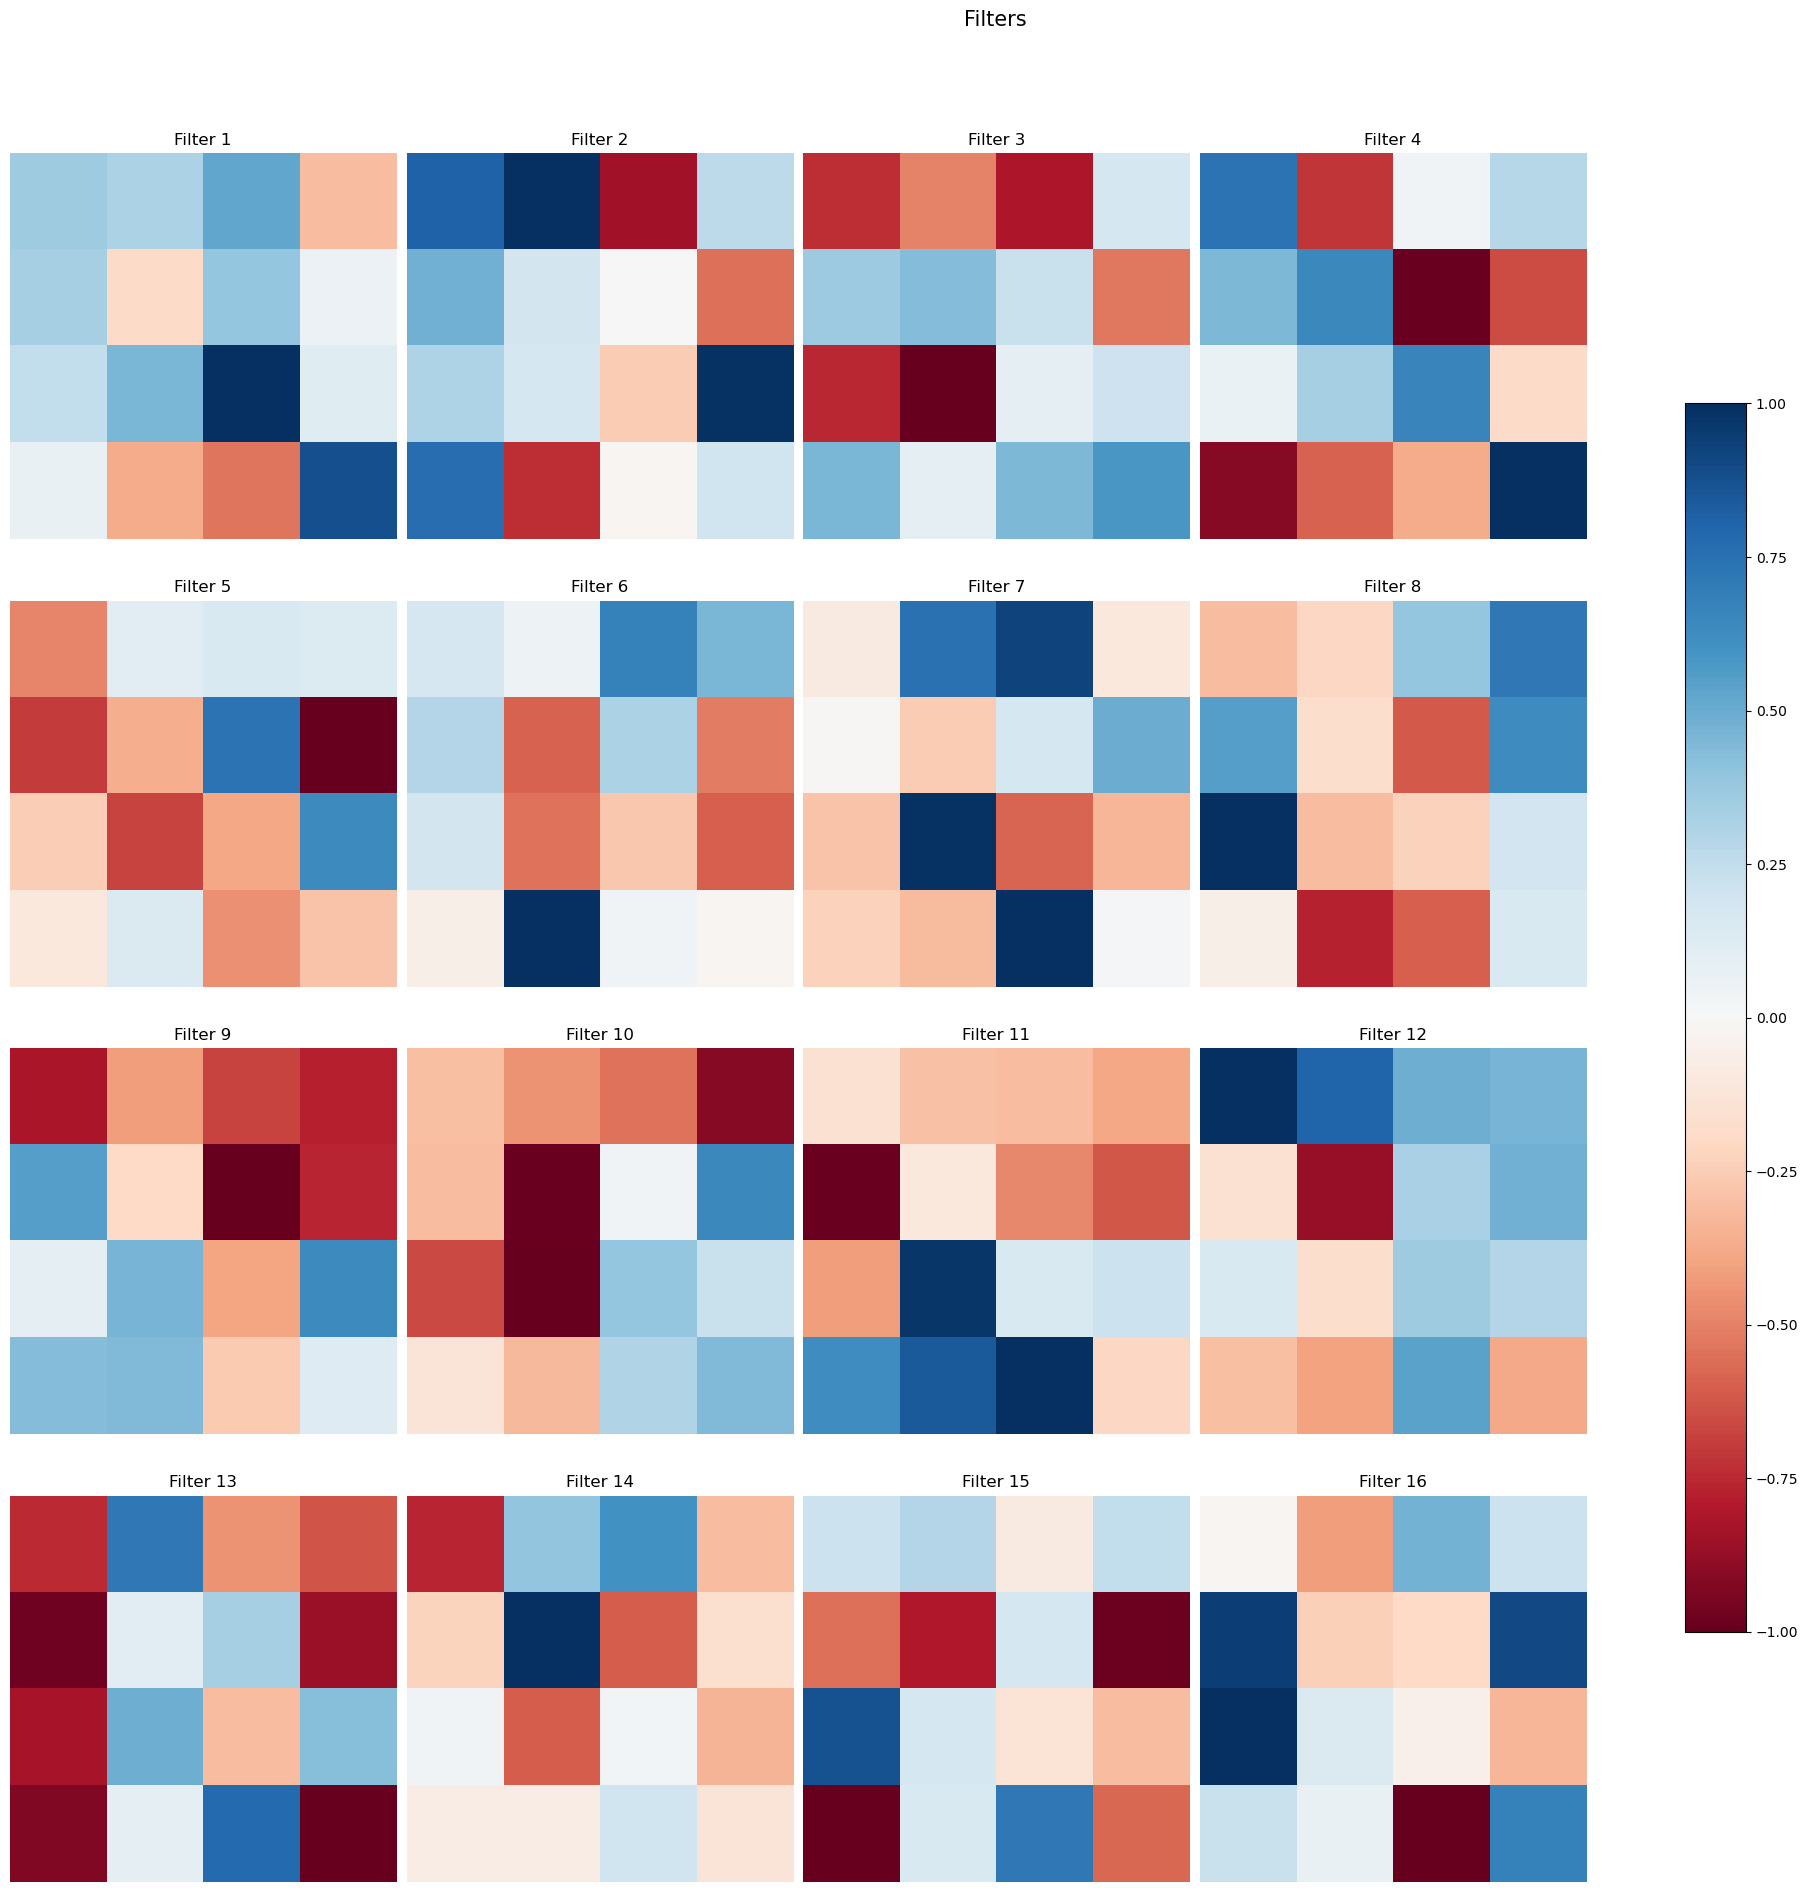

In [4]:
ckpt_dir = 'abcxo_64_Conv_15Hz'

structure = (96, 2, 'f')

model_config = [
    {
        'type': 'Conv2D', 
        'out_channels': 16, 
        'kernel_size': 4, 
    }, 
    {
        'type': 'Conv2D', 
        'out_channels': 24, 
        'kernel_size': 4, 
    }, 
    {
        'type': 'Flatten'
    },     
    {
        'type': 'Feedforward', 
        'num_out': 96       
    },
    {
        'type': 'Feedforward', 
        'num_out': 96        
    }
]

#tau_m = 50 # initial experiments
tau_m = 5.0 

snn = SNN(dataset_dict=dataset_dict, model_config=model_config, tau_m=tau_m, win=total_time, loss_fn='spk_count', batch_size=batch_size, device=device)

#snn.input2spike_th = 0.5

snn.model_name = 'abcxo_conv2'
snn.set_layers()
snn.to(device)
print(snn)

plot_conv_filters(snn.layers[0])

In [5]:
num_epochs = 20
lr = 1e-3
train(snn, train_loader, test_loader, lr, num_epochs, ckpt_dir=ckpt_dir,
       test_behavior=tb_save_max_last_refact, scheduler=(10, 0.95), test_every=1, freeze_taus=True)

Epoch [1/20], learning_rates 0.001000, 0.100000


c:\Users\Alberto\anaconda3\envs\deeplearning\lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Step [39/117], Loss: 0.16328
Step [78/117], Loss: 0.14431
Step [117/117], Loss: 0.13315
Time elasped: 173.9153618812561
1456
Test Loss: 0.12743631329225458
Avg spk_count per neuron for all 100 time-steps 2251.709615384615
Test Accuracy of the model on the test samples: 62.363

Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_64_Conv_15Hz
saving max acc: 62.362637362637365
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_64_Conv_15Hz
Epoch [2/20], learning_rates 0.001000, 0.100000
Step [39/117], Loss: 0.11725
Step [78/117], Loss: 0.10313
Step [117/117], Loss: 0.09301
Time elasped: 89.94257473945618
1456
Test Loss: 0.08953808636769005
Avg spk_count per neuron for all 100 time-steps 3378.4711538461543
Test Accuracy of the model on the test samples: 83.242

Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_64_Conv_15Hz
saving max acc: 83.24175824175825

KeyboardInterrupt: 